In [2]:
import pandas as pd
import numpy as np
import matplotlib.pylab as plt

# 某論文のデータを整形

In [16]:
df = pd.DataFrame(pd.read_csv('../data/GCR_dose.csv',header=None).values.reshape(29,10),
                 columns = ['Z','D_rate_1','D_rate_2','D_rate_3','DE_rate_1',
                            'DE_rate_2','DE_rate_3','AQF_1','AQF_2','AQF_3'])
df.sum()

Z             406.00
D_rate_1      382.54
D_rate_2      384.25
D_rate_3      359.13
DE_rate_1    2341.44
DE_rate_2    1648.65
DE_rate_3    1099.31
AQF_1         421.58
AQF_2         427.93
AQF_3         429.57
dtype: float64

In [17]:
384.25 * 1e-6 * 365*100

14.025125

In [19]:
1000*1e-2/1.5*100

666.6666666666667

# STKのデータを整形

In [6]:
def get_split_dataframe(df):
    split_point = get_split_point(df)
    df_split = []
    for i in range(len(split_point)-1):
        df_split += [df.iloc[split_point[i]:split_point[i+1]]]
    return df_split

In [7]:
def get_split_point(df):
    i = 0
    split_point = [0]
    now_dose = 0
    while(i<df.shape[0]-1):
        i += 1
        prev_dose = now_dose
        now_dose = df.iloc[i]['Combined dose (rads)']
        if now_dose < prev_dose:
            split_point.append(i)
    split_point.append(df.shape[0])
    return split_point

In [8]:
def get_total_dose(df,year=100,log=False,all_info=True,alt_num=1,thick_num=1):
    unit_dose = df['Combined dose (rads)'].iloc[-1]
    period = pd.DataFrame(pd.to_datetime(df_600_1['Time (UTCG)']) - pd.to_datetime(df_600_1['Time (UTCG)'].iloc[0])).astype('timedelta64[s]').iloc[-1].values[0]
    total = 3600*24*365.2422*year
    cycle = total/period
    total_dose = unit_dose * cycle
    if log:
        print('total dose : {0}[rad]'.format(total_dose))
    if all_info:
        alt_list = [600, 800, 1000, 1200, 2000]
        thick_list = [8.33, 16.7, 33.3, 66.7]
        alt = alt_list[alt_num-1]
        thick = thick_list[thick_num-1]
        return [alt,thick,total_dose]
    else:
        return total_dose

In [26]:
def plot_dose(df,alt,num):
    fig, ax = plt.subplots(1, 3, figsize=(15, 4))
    ax[0].plot(df['Electron dose (rads)'])
    ax[0].set_title('Electron dose (rads)')
    
    ax[1].plot(df['Proton dose (rads)'])
    ax[1].set_title('Proton dose (rads)')
    
    ax[2].plot(df['Combined dose (rads)'])
    ax[2].set_title('Combined dose (rads)')
    
    thickness_list = [66.7,33.3,16.7,8.33]
    name = 'altitude = {0}[km] \n thickness = {1}[mm]'.format(alt,thickness_list[num-1])
    fig.suptitle(name, fontsize=16,y=1.1)

In [10]:
df_600 = pd.read_csv('../data/rad_600.csv')
df_800 = pd.read_csv('../data/rad_800.csv')
df_1000 = pd.read_csv('../data/rad_1000.csv')
df_1200 = pd.read_csv('../data/rad_1200.csv')
df_2000 = pd.read_csv('../data/rad_2000.csv')

In [11]:
df_600_1,df_600_2,df_600_3,df_600_4 = get_split_dataframe(df_600)
df_800_1,df_800_2,df_800_3,df_800_4 = get_split_dataframe(df_800)
df_1000_1,df_1000_2,df_1000_3,df_1000_4 = get_split_dataframe(df_1000)
df_1200_1,df_1200_2,df_1200_3,df_1200_4 = get_split_dataframe(df_1200)
df_2000_1,df_2000_2,df_2000_3,df_2000_4 = get_split_dataframe(df_2000)

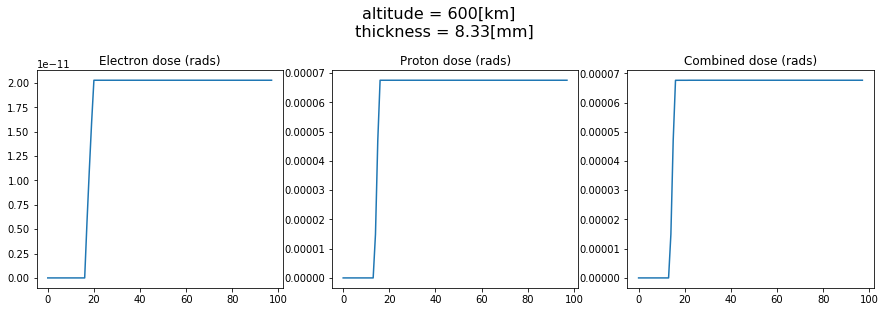

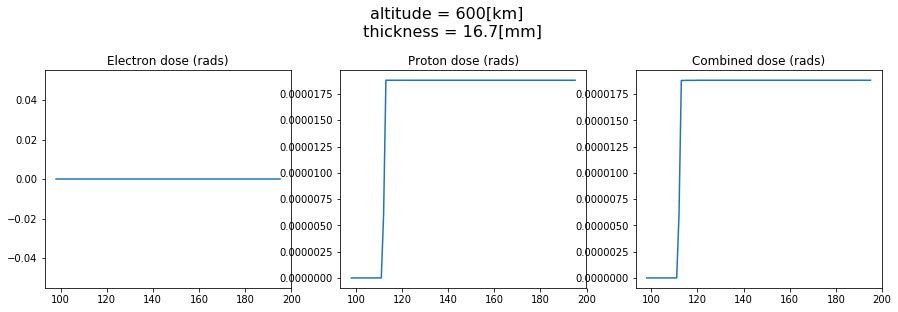

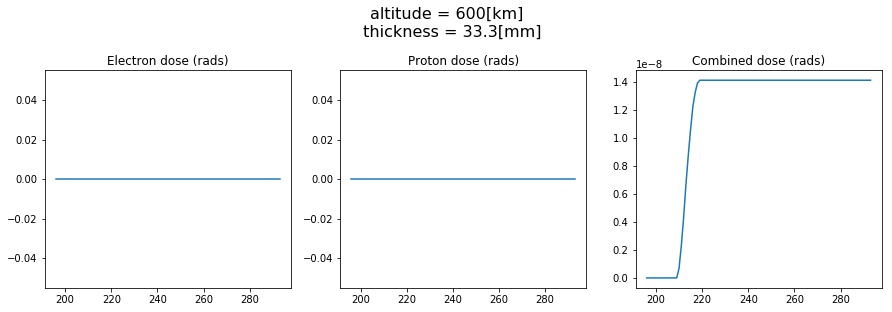

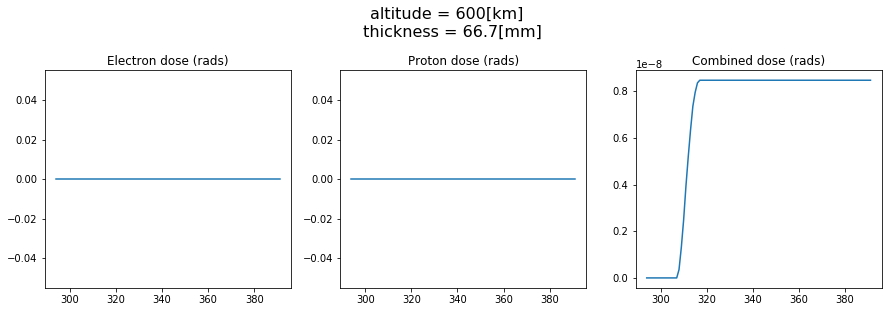

In [12]:
alt = 600
plot_dose(df_600_1,alt,num=1)
plot_dose(df_600_2,alt,num=2)
plot_dose(df_600_3,alt,num=3)
plot_dose(df_600_4,alt,num=4)

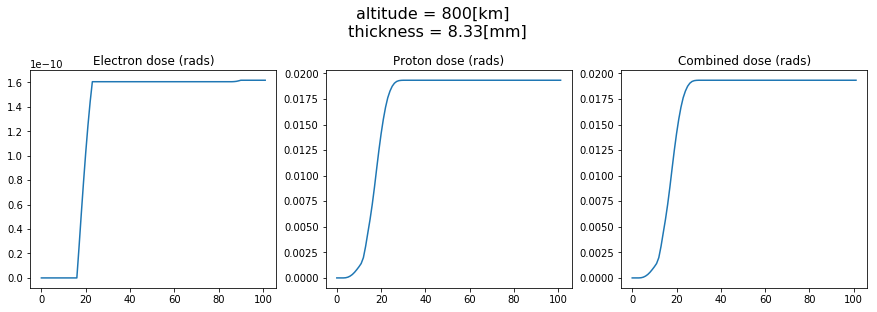

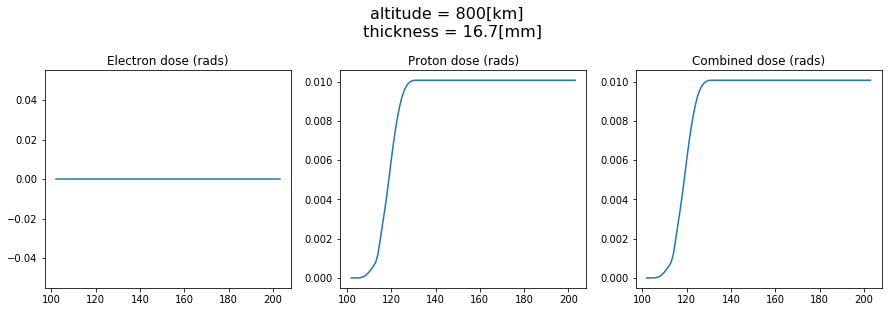

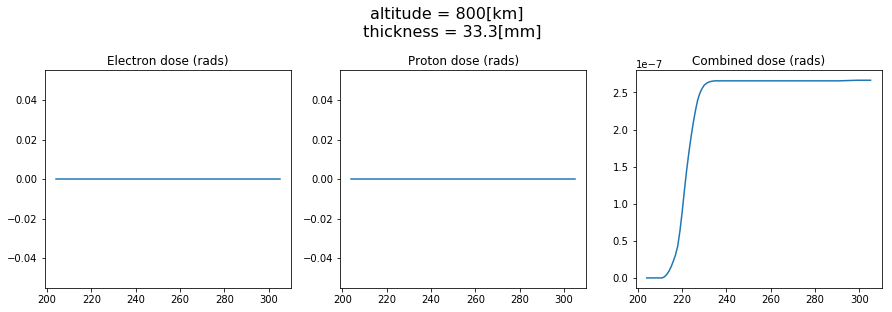

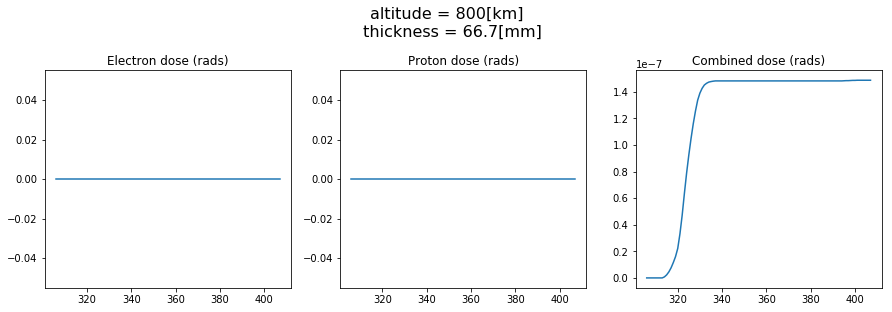

In [13]:
alt = 800
plot_dose(df_800_1,alt,num=1)
plot_dose(df_800_2,alt,num=2)
plot_dose(df_800_3,alt,num=3)
plot_dose(df_800_4,alt,num=4)

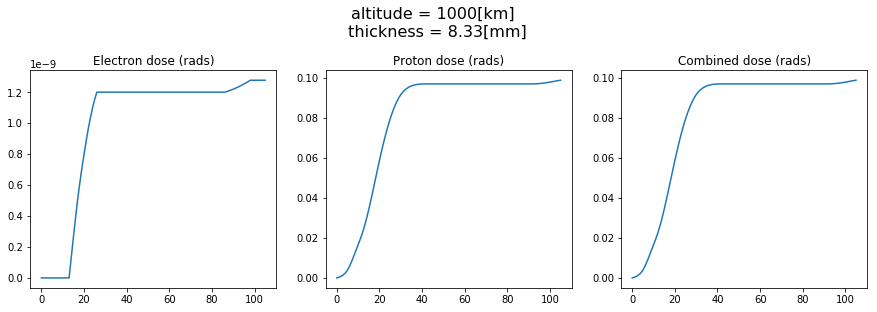

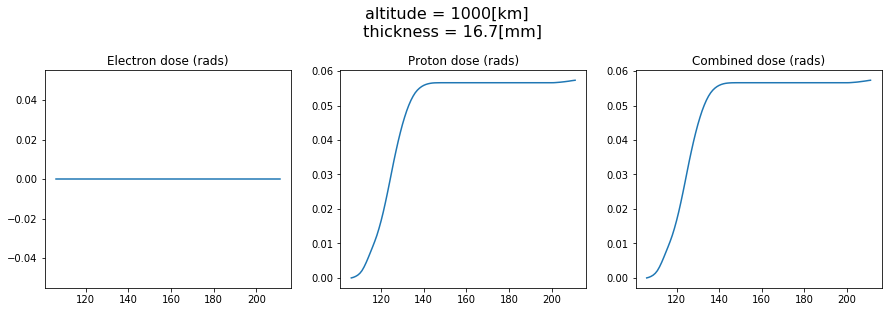

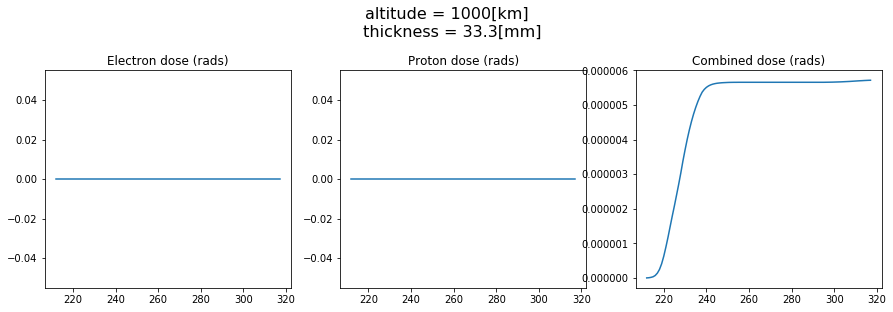

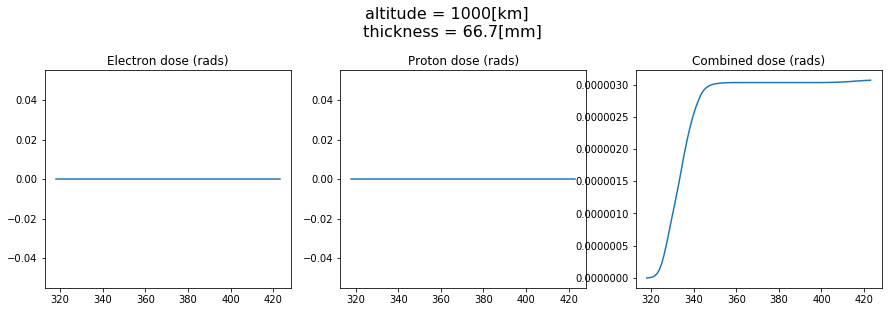

In [14]:
alt = 1000
plot_dose(df_1000_1,alt,num=1)
plot_dose(df_1000_2,alt,num=2)
plot_dose(df_1000_3,alt,num=3)
plot_dose(df_1000_4,alt,num=4)

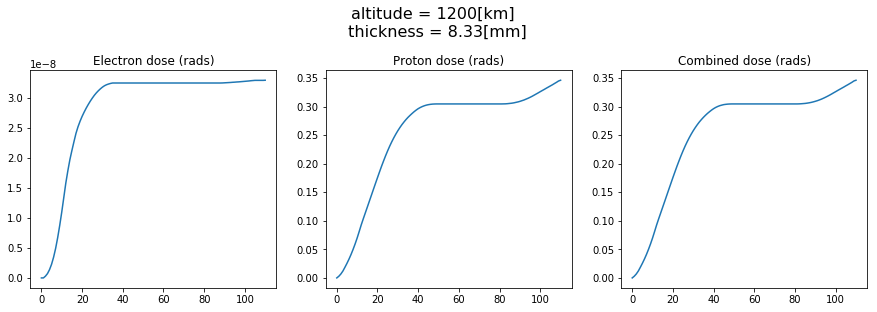

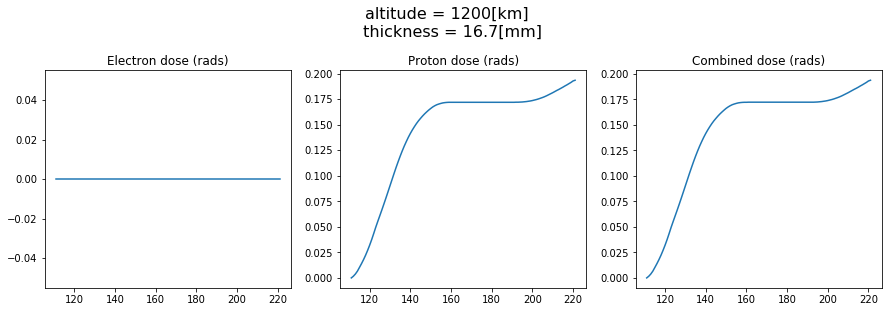

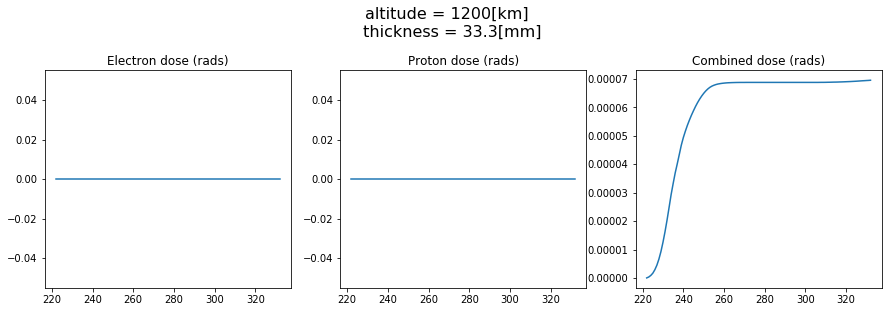

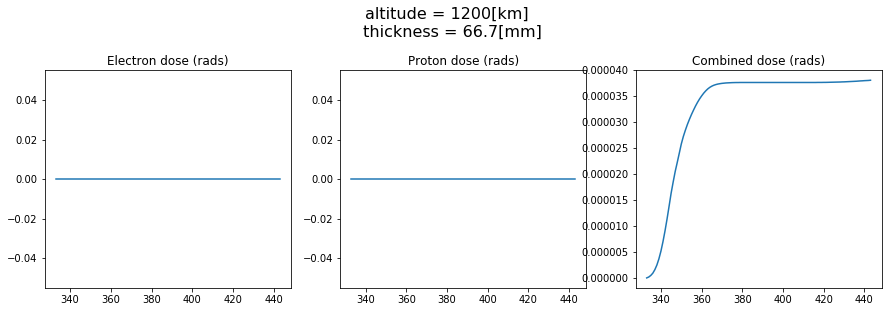

In [15]:
alt = 1200
plot_dose(df_1200_1,alt,num=1)
plot_dose(df_1200_2,alt,num=2)
plot_dose(df_1200_3,alt,num=3)
plot_dose(df_1200_4,alt,num=4)

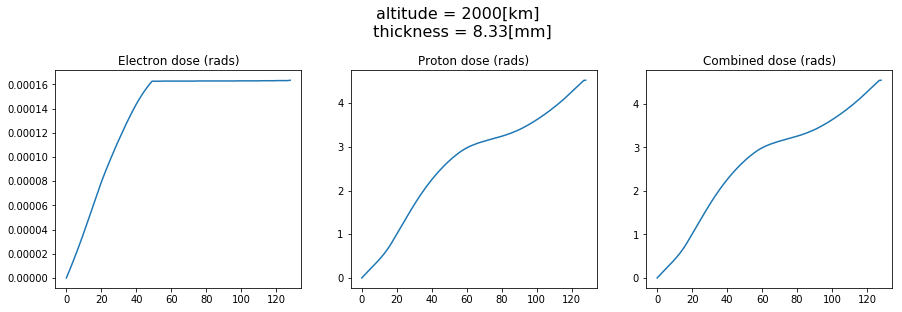

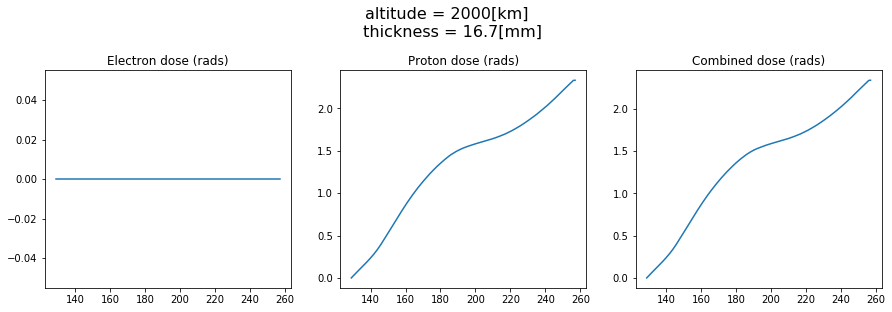

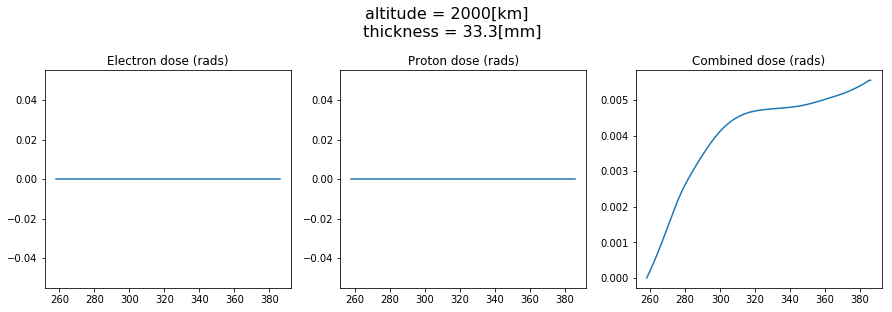

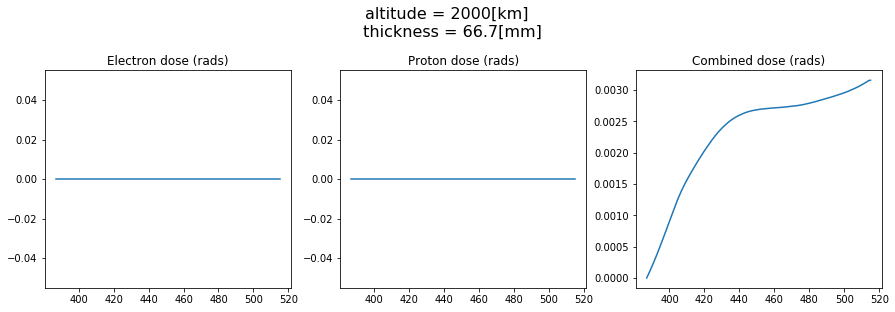

In [16]:
alt = 2000
plot_dose(df_2000_1,alt,num=1)
plot_dose(df_2000_2,alt,num=2)
plot_dose(df_2000_3,alt,num=3)
plot_dose(df_2000_4,alt,num=4)

In [21]:
alt = [600, 800, 1000, 1200, 2000]
thick = [8.33, 16.7, 33.3, 66.7]

In [32]:
df_list = [[df_600_1,df_600_2,df_600_3,df_600_4],
           [df_800_1,df_800_2,df_800_3,df_800_4],
           [df_1000_1,df_1000_2,df_1000_3,df_1000_4],
           [df_1200_1,df_1200_2,df_1200_3,df_1200_4],
           [df_2000_1,df_2000_2,df_2000_3,df_2000_4]]

In [36]:
dose_list = []
for i in range(len(alt)):
    for j in range(len(thick)):
        dose_list.append(get_total_dose(df_list[i][j], alt_num=i+1, thick_num=j+1 ))
df_dose = pd.DataFrame(dose_list,columns=['altitude [km]',
                                          'thickness [mm]',
                                          'total_dose [rad]']
                      ).set_index(['altitude [km]',
                                   'thickness [mm]'])
df_dose

total_dose [rad]
altitude [km] thickness [mm]                  
600           8.33                3.682821e+01
              16.70               1.025396e+01
              33.30               7.683662e-03
              66.70               4.610197e-03
800           8.33                1.053168e+04
              16.70               5.483663e+03
              33.30               1.450693e-01
              66.70               8.097524e-02
1000          8.33                5.374752e+04
              16.70               3.122475e+04
              33.30               3.113762e+00
              66.70               1.670148e+00
1200          8.33                1.885792e+05
              16.70               1.054802e+05
              33.30               3.789009e+01
              66.70               2.070396e+01
2000          8.33                2.472821e+06
              16.70               1.274257e+06
              33.30               3.026089e+03
              66.70               1.720247e+03

In [56]:
dose_list = pd.DataFrame(np.zeros([len(alt),len(thick)]),index=alt,columns=thick)
for i in range(len(alt)):
    for j in range(len(thick)):
        dose_list.iloc[i,j] = get_total_dose(df_list[i][j],
                                             alt_num=i+1,
                                             thick_num=j+1,
                                             all_info=False
                                            )
dose_list.to_csv('../output/total_dose.csv')